In [1]:
import os
import sys
import torch
import networkx as nx
import matplotlib.pyplot as plt
from numpy.linalg import eig
import seaborn as sns
import numpy as np
from sftd import sftd_graph, plot_barcodes

In [2]:
ws = nx.read_adjlist("example_graph")
#nx.write_adjlist(ws, "example_graph")

In [3]:
A = nx.adjacency_matrix(ws).todense()

/tmp/ipykernel_2473936/339496563.py:1: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A = nx.adjacency_matrix(ws).todense()


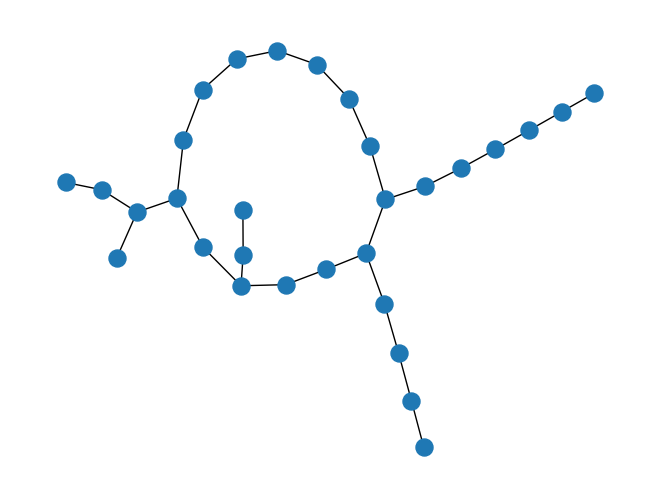

In [4]:
nx.draw_kamada_kawai(ws, node_size = 150)

In [5]:
NL = nx.normalized_laplacian_matrix(ws)

<class 'networkx.utils.decorators.argmap'> compilation 13:4: FutureWarning: normalized_laplacian_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.


In [6]:
vals, vecs = eig(NL.A)

In [7]:
vals

array([2.74086309e-16, 2.33360663e-02, 4.42892668e-02, 7.10970805e-02,
       9.23307593e-02, 1.57873334e-01, 2.60740741e-01, 2.92893219e-01,
       3.94193109e-01, 4.61321984e-01, 5.37625576e-01, 6.07887908e-01,
       6.86175502e-01, 8.50060495e-01, 8.70094442e-01, 1.12990556e+00,
       1.14993951e+00, 1.31382450e+00, 1.39211209e+00, 1.46237442e+00,
       1.53867802e+00, 1.60580689e+00, 2.00000000e+00, 1.97666393e+00,
       1.95571073e+00, 1.92890292e+00, 1.90766924e+00, 1.84212667e+00,
       1.70710678e+00, 1.73925926e+00])

In [8]:
#np.save('vals.np', vals)
#np.save('vecs.np', vecs)

vals = np.load('vals.np.npy')
vecs = np.load('vecs.np.npy')

### Calc heatmap

In [9]:
def trans(r):
    d0 = r['dgms'][0]
    A0 = np.zeros((d0.shape[0], 3))
    A0[:,0:2] = d0
    A0[:,2] = 0

    d1 = r['dgms'][1]
    A1 = np.zeros((d1.shape[0], 3))
    A1[:,0:2] = d1
    A1[:,2] = 1
    
    d2 = r['dgms'][2]
    A2 = np.zeros((d2.shape[0], 3))
    A2[:,0:2] = d2
    A2[:,2] = 2
    
    return np.concatenate((A0, A1, A2), axis = 0)

In [10]:
def get_barc_sum(r, dim, p = 1):
    barcs = r['dgms'][dim]

    sumL = 0.

    for i in range(barcs.shape[0]):
        if barcs[i][0] < np.inf and barcs[i][1] < np.inf:
            sumL += (barcs[i][1] - barcs[i][0]) ** p
            
    return sumL

In [11]:
def calc_dist(A, V0, V1, dim = 0):
    
    r1 = sftd_graph(A, V0, V1)
    r2 = sftd_graph(A, V1, V0)
    
    return get_barc_sum(r1, dim, p = 2) + get_barc_sum(r2, dim, p = 2)

In [12]:
D0 = np.zeros((30, 30))

for i in range(30):
    for j in range(30):
        
        V0 = np.array(vecs[:,i])
        V1 = np.array(vecs[:,j])
        
        D0[i, j] = calc_dist(A, V0, V1, 0)

<AxesSubplot:>

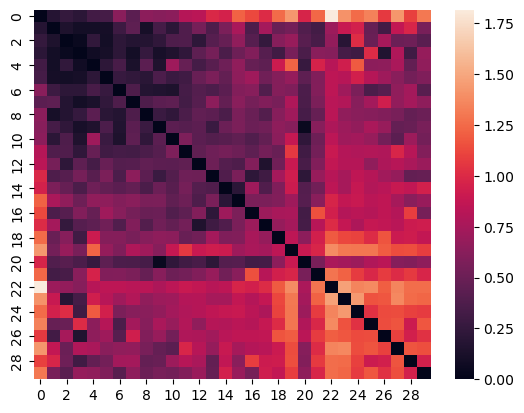

In [13]:
sns.heatmap(D0)

In [14]:
D1 = np.zeros((30, 30))

for i in range(30):
    for j in range(30):
        
        V0 = np.array(vecs[:,i])
        V1 = np.array(vecs[:,j])
        
        D1[i, j] = calc_dist(A, V0, V1, 1)

<AxesSubplot:>

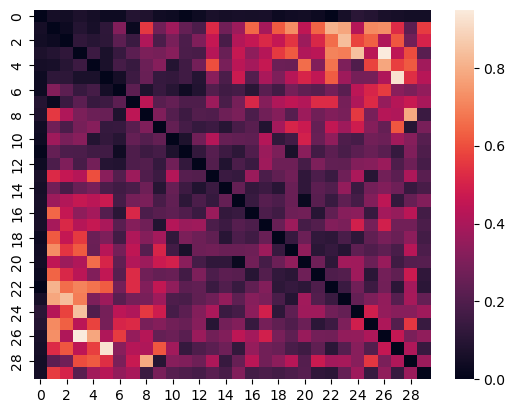

In [15]:
sns.heatmap(D1)

<AxesSubplot:>

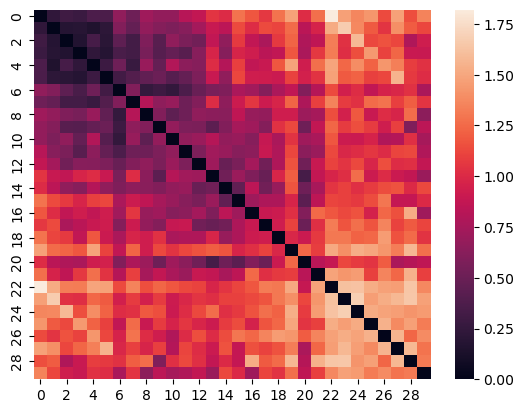

In [16]:
sns.heatmap(D0 + D1)

In [17]:
data = []

for i in range(30):
    for j in range(30):
        if i < j:
            data.append((D0[i, j] + D1[i, j], i, j))
            
sorted(data, key = lambda x : x[0])

[(0.1548555765574513, 1, 4),
 (0.16965550565111442, 2, 3),
 (0.17998933217777602, 1, 2),
 (0.1834669944186294, 3, 5),
 (0.18882245734079178, 1, 3),
 (0.20620039012933056, 2, 5),
 (0.21745586655687005, 1, 5),
 (0.23168616298874767, 0, 1),
 (0.23284732146746162, 3, 4),
 (0.24715364607505325, 6, 10),
 (0.25251625831542923, 6, 8),
 (0.27208939655970577, 4, 7),
 (0.27896454213413496, 0, 3),
 (0.2851994292297227, 4, 5),
 (0.2985903099289644, 6, 9),
 (0.2991024242710071, 0, 2),
 (0.3176089613062002, 5, 6),
 (0.32275043707597106, 3, 7),
 (0.32310485446120396, 2, 7),
 (0.3342786836594619, 13, 20),
 (0.340262975211727, 2, 4),
 (0.3514722619001149, 3, 6),
 (0.36175667468358946, 0, 5),
 (0.36682790983553604, 6, 11),
 (0.36840073367442594, 0, 4),
 (0.39446100128101824, 5, 7),
 (0.4062611979168223, 3, 9),
 (0.4095773458065535, 5, 10),
 (0.4150294847595851, 2, 9),
 (0.4191940071928446, 3, 11),
 (0.43060119653831613, 15, 20),
 (0.43440093995035, 9, 13),
 (0.44279911844454, 8, 10),
 (0.4472239164522742

### Visalize example

In [18]:
def draw_sftd(V0, V1):
    r = sftd_graph(A, V1, V0, maxdim = 2)    
    plot_barcodes([r['dgms'][0], r['dgms'][1]])

0 3
1 4


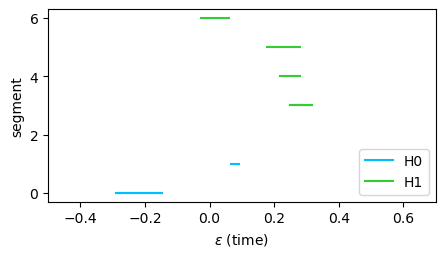

In [19]:
fig, ax = plt.subplots(1, 1)
#ax.set_ylim(-0.5, 4)
ax.set_xlim(-0.5, 0.7)
fig.set_size_inches((5, 2.5))

draw_sftd(vecs[:,1], vecs[:,4])

0 3
1 2


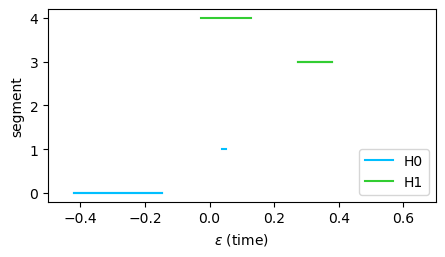

In [20]:
fig, ax = plt.subplots(1, 1)
#ax.set_ylim(-0.5, 4)
ax.set_xlim(-0.5, 0.7)
fig.set_size_inches((5, 2.5))

draw_sftd(vecs[:,4], vecs[:,1])

0 1
1 0


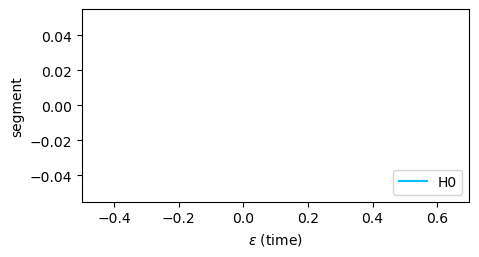

In [21]:
fig, ax = plt.subplots(1, 1)
#ax.set_ylim(-0.5, 4)
ax.set_xlim(-0.5, 0.7)
fig.set_size_inches((5, 2.5))

draw_sftd(vecs[:,0], vecs[:,22])

0 16
1 2


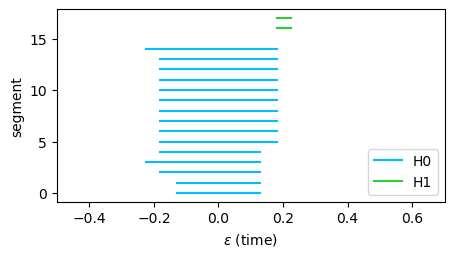

In [22]:
fig, ax = plt.subplots(1, 1)
#ax.set_ylim(-0.5, 4)
ax.set_xlim(-0.5, 0.7)
fig.set_size_inches((5, 2.5))

draw_sftd(vecs[:,22], vecs[:,0])

### Examples of different clusters

### example 1

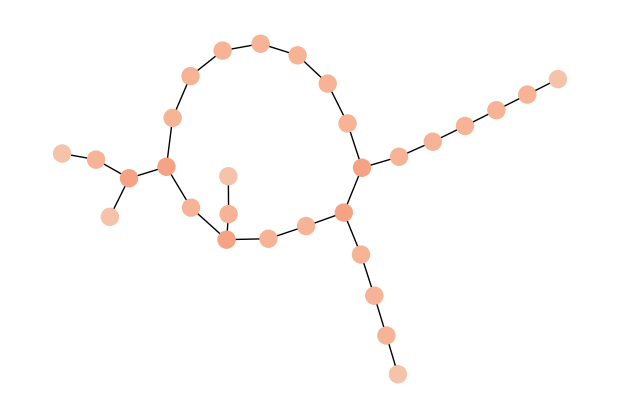

In [23]:
n_vertices = NL.shape[0]
V = np.array(vecs[:,0])

nx.draw_kamada_kawai(ws, node_color=V, node_size=150, cmap=plt.cm.coolwarm, linewidths = 1, vmin = -0.5, vmax = 0.5)

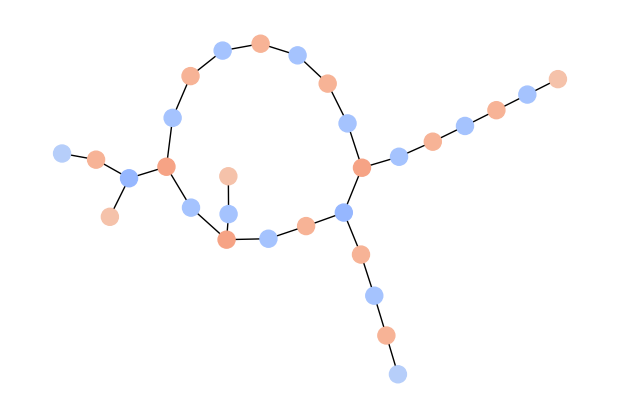

In [24]:
n_vertices = NL.shape[0]
V = np.array(vecs[:,22])

nx.draw_kamada_kawai(ws, node_color=V, node_size=150, cmap=plt.cm.coolwarm, vmin = -0.5, vmax = 0.5)

### example 2

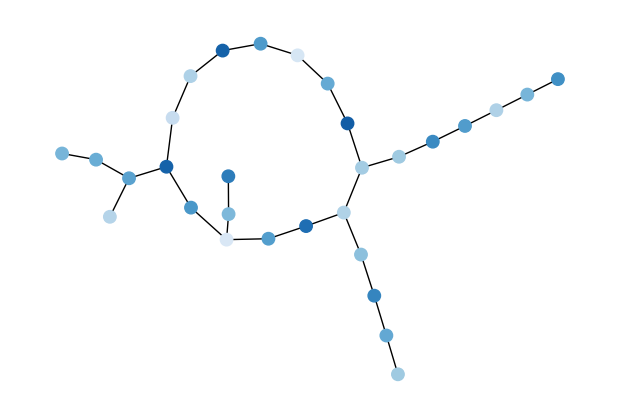

In [25]:
n_vertices = NL.shape[0]
V = np.array(vecs[:,16])

nx.draw_kamada_kawai(ws, node_color=V, node_size=80, cmap=plt.cm.Blues, vmin = -0.5, vmax = 0.5)

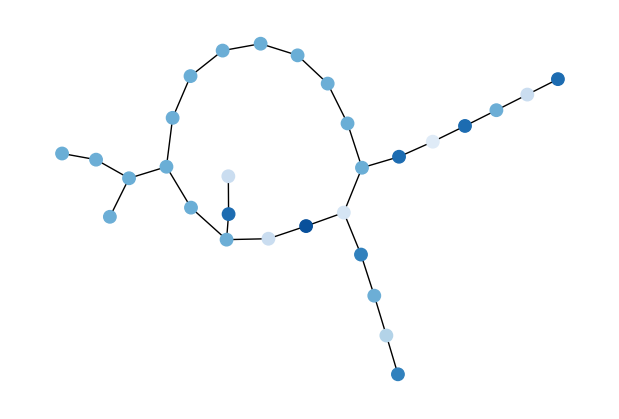

In [26]:
n_vertices = NL.shape[0]
V = np.array(vecs[:,28])

nx.draw_kamada_kawai(ws, node_color=V, node_size=80, cmap=plt.cm.Blues, vmin = -0.5, vmax = 0.5)

### Examples of simillar clusters

### example 1

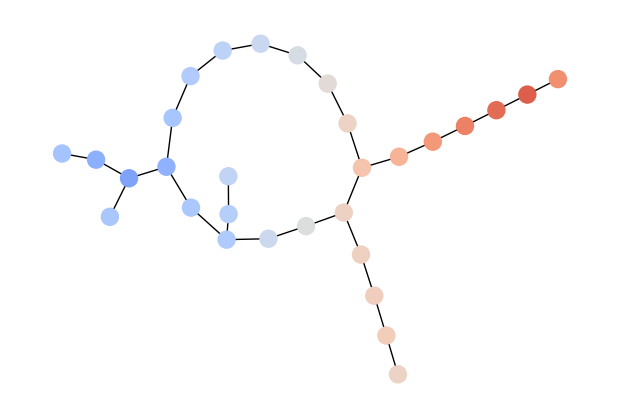

In [27]:
n_vertices = NL.shape[0]
V = np.array(vecs[:,1])

nx.draw_kamada_kawai(ws, node_color=V,  node_size=150, cmap=plt.cm.coolwarm, vmin = -0.5, vmax = 0.5)

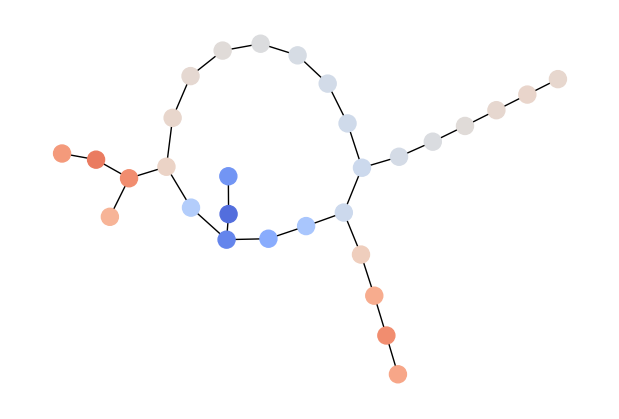

In [28]:
n_vertices = NL.shape[0]
V = np.array(vecs[:,4])

nx.draw_kamada_kawai(ws, node_color=V,  node_size=150, cmap=plt.cm.coolwarm, vmin = -0.5, vmax = 0.5)

### example 2

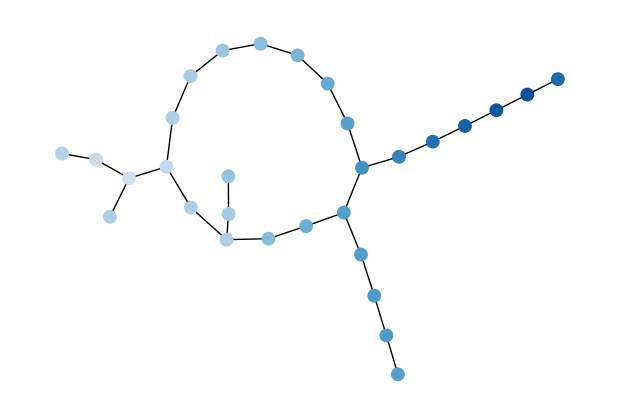

In [29]:
n_vertices = NL.shape[0]
V = np.array(vecs[:,1])

nx.draw_kamada_kawai(ws, node_color=V, node_size=80, cmap=plt.cm.Blues, vmin = -0.5, vmax = 0.5)

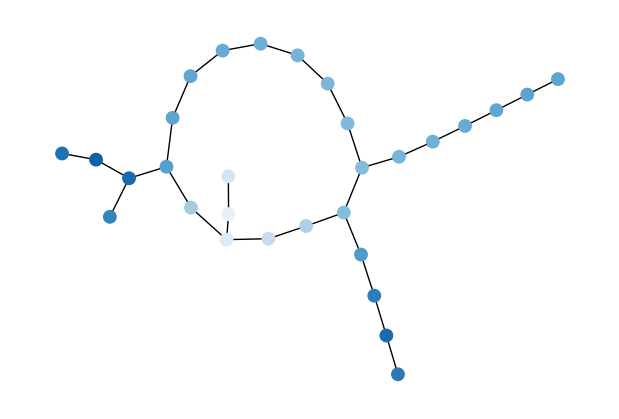

In [30]:
n_vertices = NL.shape[0]
V = np.array(vecs[:,4])

nx.draw_kamada_kawai(ws, node_color=V, node_size=80, cmap=plt.cm.Blues, vmin = -0.5, vmax = 0.5)